# Lesson 3 k-Means Clustering

If you use the base environment of anaconda then the packages should be installed. If you get a ModuleNotFoundError, please install the packages using either

```
conda install numpy pandas scikit-learn matplotlib 
```
or (if you work in a machine without anaconda in the future)
```
pip install numpy pandas sklearn matplotlib
```

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

## Data Preparation

In [2]:
# importing the Iris dataset with pandas
dataset = pd.read_csv('Iris.csv')


In [3]:
print(dataset.head())
print(type(dataset))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>


In [4]:
ds1_4 = dataset.iloc[:, [1,2,3,4]]
print (ds1_4.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [5]:
x = dataset.iloc[:, [1,2,3,4]].values
print(type(x))
print(x[0:5,:])

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Training

Clustering technique do not have the notion of training vs testing data, so we don't have to do any split on the data. 

In [6]:
km2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km2.fit(x)
y_kmeans = km2.fit_predict(x)

In [7]:
ds1_4[y_kmeans==0].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Numpy Boolean Selection

To understand some of the code below, we need to understand a feature in NumPy array. NumPy allow you to choose the rows that you want to include using boolean selection by providing a list of boolean values (True means include and False means exclude). 

In [8]:
#Let's work with a small example: 5 rows only

x_head = x[0:5,:]
print(x_head)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
# we are selecting only 1st, 3rd and 5th rows (note the boolean list)
x_head[[True,False,True,False, True],1]

array([3.5, 3.2, 3.6])

In [10]:
# what are the rows that it's column 0 values larger than 4.8?
x_head[:,0]>4.8

array([ True,  True, False, False,  True])

In [11]:
# we use it in the array
x_head[x_head[:,0]>4.8, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


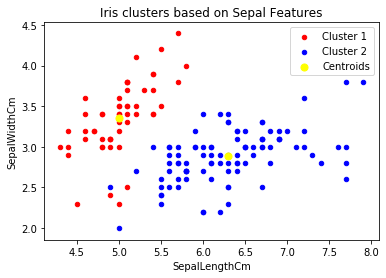

In [12]:
#Visualising the clusters by selecting only column 0 and 1
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
print (dataset.columns)
plt.title('Iris clusters based on Sepal Features')
plt.xlabel(dataset.columns[1])
plt.ylabel(dataset.columns[2])

plt.legend()
plt.show()

In [13]:
plt.map?

Object `plt.map` not found.


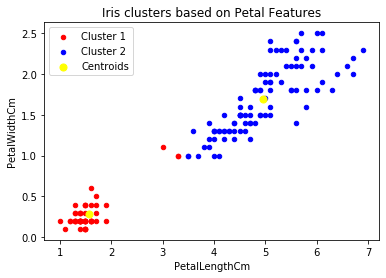

In [14]:
#Visualising the clusters by selecting only column 3 and 4
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 20, c = 'blue', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(km2.cluster_centers_[:, 2], km2.cluster_centers_[:,3], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Iris clusters based on Petal Features')
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])

plt.legend()
plt.show()

## Elbow Method - Finding Optimum Number of Cluster for k-Means Classifications

The basic idea of elbow method is that we try multiple k values and then we measure the within-cluster-sum-of-square (WCSS) value. We then plot WCSS for each k values and we look for the "elbow" to determine the optimal number of cluster. 

The elbow can be casually defined as the place where the line goes from very steep to not so steep. One downside of the elbow method is that it can be somewhat ambiguous to spot the elbow.

### WCSS
WCSS indicates how far are the points from its centroids. 

Of course, with more centroids we expect that WCSS will be lower. Just like the more groceries in the city, the less distance everybody need to get our groceries. 


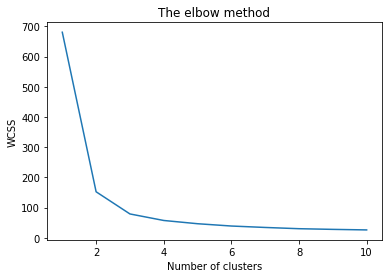

In [15]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## k-Means with 3 clusters

Using the elbow method, we decided that the optimal number of cluster is 3. Let's look at how the data looks like with 3 clusters. 

In [16]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

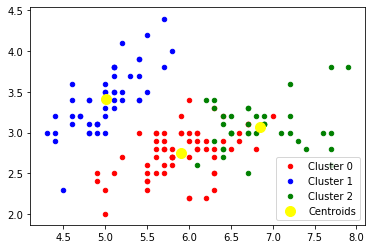

In [17]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()